In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math
import plots

f = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_hadron_xsec.root")

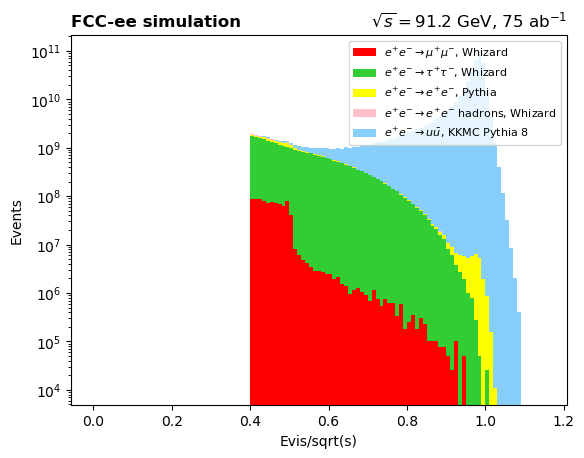

In [2]:
plots.plot(5,["mu","tau","e","gaga","u_kkmc"],"norm_energy_vis","norm_energy","Evis/sqrt(s)", stack_yn = True)

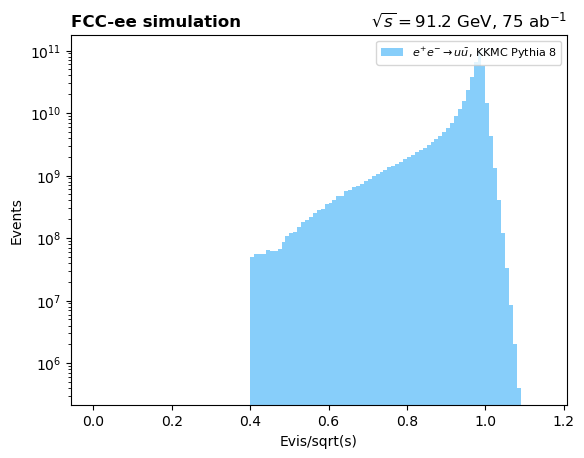

In [3]:
plots.plot(1,["u_kkmc"],"norm_energy_vis","norm_energy","Evis/sqrt(s)")

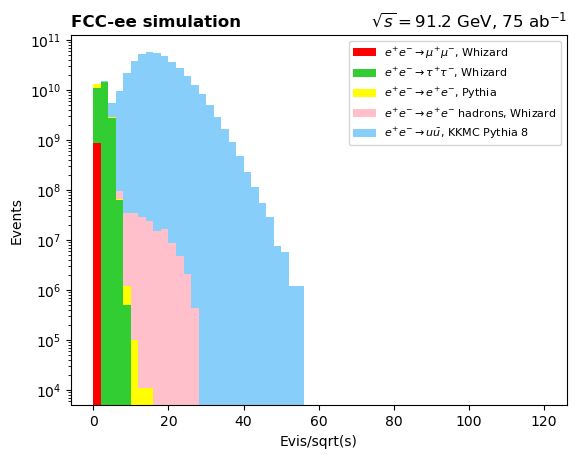

In [4]:
plots.plot(5,["mu","tau","e","gaga","u_kkmc"],"n_charged","n_charged","Evis/sqrt(s)")

Text(0.0, 1.0, 'FCC-ee simulation')

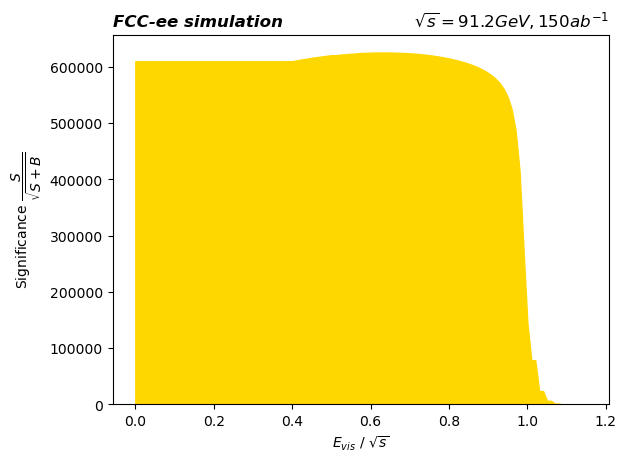

In [5]:
e = f['kkmc_ee_uu_ecm91p2/norm_energy_vis'].to_hist()
tau_e = f['wzp6_ee_tautau_ecm91p2/norm_energy_vis;1'].to_hist()
mu_e = f['wzp6_ee_mumu_ecm91p2/norm_energy_vis;1'].to_hist()
e_e = f["p8_ee_Zee_ecm91/norm_energy_vis"].to_hist()
gaga_e = f['wzp6_gaga_qq_5_ecm91p2/norm_energy_vis;1'].to_hist()
e_y, e_x = e.to_numpy()
e_ynew = []

for i in e_x:
    s = e[i*1.0j:].sum()
    b = tau_e[i*1.0j:].sum()+mu_e[i*1.0j:].sum()+gaga_e[i*1.0j:].sum()+e_e[i*1.0j:].sum()
    if s.value+b.value < 0.00000000000000000000000000000000000000000000000000000001:
        e_ynew.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        e_ynew.append(ratio)

plt.stackplot(e_x,e_ynew, color = "gold")
#plt.ylim(5e5,6.3e5)
#plt.xlim(23,75)
plt.xlabel(r"$E_{vis}$ / $ \sqrt{s}$")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hadron_xsec/cut_sum_e_filter.png")

In [6]:
optmize = max(e_ynew)
index = np.argmax(e_ynew)
cut = e_x[index]

print(optmize)
print(cut)

625547.0872740344
0.64


In [ ]:
e = f['kkmc_ee_uu_ecm91p2/n_charged'].to_hist()
tau_e = f['wzp6_ee_tautau_ecm91p2/n_charged;1'].to_hist()
mu_e = f['wzp6_ee_mumu_ecm91p2/n_charged;1'].to_hist()
e_e = f["p8_ee_Zee_ecm91/n_charged"].to_hist()
gaga_e = f['wzp6_gaga_qq_5_ecm91p2/n_charged;1'].to_hist()
e_y, e_x = e.to_numpy()
e_ynew = []

for i in e_x:
    s = e[i*1.0j:].sum()
    b = tau_e[i*1.0j:].sum()+mu_e[i*1.0j:].sum()+gaga_e[i*1.0j:].sum()+e_e[i*1.0j:].sum()
    if s.value+b.value < 0.00000000000000000000000000000000000000000000000000000001:
        e_ynew.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        e_ynew.append(ratio)

plt.stackplot(e_x,e_ynew, color = "gold")
#plt.ylim(6.31e5,6.325e5)
#plt.xlim(10,18)
plt.xlabel(r"Number of Particles$")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91.2 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/hadron_xsec/cut_sum_e_filter.png")

Text(0.0, 1.0, 'FCC-ee simulation')

In [ ]:
optmize = max(e_ynew)
index = np.argmax(e_ynew)
cut = e_x[index]

print(optmize)
print(cut)

In [ ]:
cuts = f["kkmc_ee_uu_ecm91p2/cutFlow"].to_hist()
gaga_cuts = f['wzp6_gaga_qq_5_ecm91p2/cutFlow;1'].to_hist()
tau_cuts = f['wzp6_ee_tautau_ecm91p2/cutFlow;1'].to_hist()
mu_cuts = f['wzp6_ee_mumu_ecm91p2/cutFlow;1'].to_hist()
e_cuts = f['p8_ee_Zee_ecm91/cutFlow;1'].to_hist()

events0,cuts_x = cuts.to_numpy()
gaga_events0,gaga_cuts_x = gaga_cuts.to_numpy()
tau_events0,tau_cuts_x = tau_cuts.to_numpy()
mu_events0,mu_cuts_x = mu_cuts.to_numpy()
e_events0,e_cuts_x = e_cuts.to_numpy()

print(events0[0], events0[1],events0[2])
print(events0[2]/events0[0])
print(gaga_events0[2])
print(tau_events0[2])
print(mu_events0[2])
print(e_events0[2])